<a href="https://colab.research.google.com/github/SarahFSBorges/data.science/blob/main/Feature_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este exercício foi realizado com base no curso Data Science na Prática 3.0.

# Feature Scaling

**Quando usar técnicas de feature scaling?**

Quando estiver trabalhando com algoritmos baseados em **gradient descent** (atualizam seus parâmetros individualmente, escalas diferentes irão fazer muita diferença) ou algoritmos baseados em **distância** (distância entre pontos/dados para estabelecer o grau de similaridade, magnitudes extremas privilegiam algumas features).



**E os algoritmos baseados em árvores?**

Não são impactados às diferentes escalas das features. Pois cria-se nós de decisão baseando-se unicamente em cada feature isoladamente.



##### **Normalization** is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.


##### **Standardization** is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

## Padronização

Padronização é quando as features sofrem uma mudança de escala, e passa a ter as propriedades de uma distribuição normal com média $\mu = 0$ e desvio padrão $\sigma = 1$.

Na padronização, os z-scores são calculados da seguinte maneira:

$$
z = \frac{x - \mu}{\sigma}
$$

In [ ]:
# importar pacotes
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# importar dados
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/wine_data.csv", header=None)
df = df.iloc[:,0:3].copy()
df.columns = ['Label', 'Alcohol', 'MalicAcid'
]

# ver 5 primeiras entradas
df.head()

,Label,Alcohol,MalicAcid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


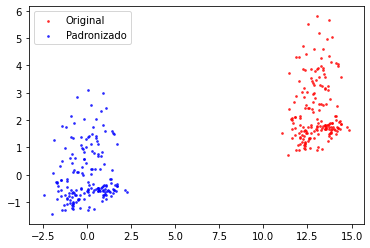

In [ ]:
# padronização
std = StandardScaler().fit_transform(df[['Alcohol','MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1], c='blue', s=3, label='Padronizado', alpha=.7)
plt.legend(loc='upper left')
plt.show()

## Normalização

Basicamente, a normalização coloca os dados dentro de uma escala $[0, 1]$. Apesar de não ser a única forma de normalização, utiliza-se mais frequentemente o `Min-Max scaling`, que é calculado da seguinte maneira:

$$
X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

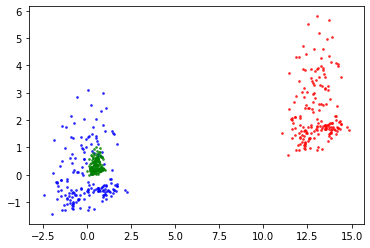

In [ ]:
# normalização
minmax = MinMaxScaler().fit_transform(df[['Alcohol', 'MalicAcid']])

# plotar
fig, ax = plt.subplots()
ax.scatter('Alcohol', 'MalicAcid', c='red', s=3, label='Original', alpha=.7, data=df)
ax.scatter(std[:,0], std[:,1],c='blue', s=3, label='Padronizado', alpha=.7)
ax.scatter(minmax[:,0], minmax[:,1], c='green', s=3, label='Normalizado', alpha=.7)
plt.show()

Obs.:

*   Redes neurais normalmente irão esperar valores normalizados entre 0 e 1.
*   Normalização é muito mais sensível à presença de outliers.